<a href="https://colab.research.google.com/github/pahrul23/pahrul-skripsi/blob/main/preprocessing-Tahap1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files 
uploades = files.upload()

Saving KREDIVO.csv to KREDIVO.csv


In [ ]:
df_dataReview = pd.read_csv('KREDIVO.csv')

In [ ]:
df_dataReview.head(3000)

,content,sentiment
0,ingin menambahkan akun bank tapi gak bisa mili...,negatif
1,Kredit limitnya kecil banget bingung mau pake ...,negatif
2,Sangat membantu,negatif
3,Mantap,negatif
4,"Awalnya sangat membantu, tapi lama sudah tidak...",negatif
...,...,...
2995,Rawan penipuann,positif
2996,Iseng-iseng daftar dan ga mengajukan pinjaman ...,positif
2997,"Klo menurut sy kredivo memang top, wlw custome...",positif
2998,puas,positif


In [ ]:
import re

In [ ]:
def cleaningulasan(ulasan):
  ulasan = re.sub(r'@[A-Za-a0-9]+',' ',ulasan)
  ulasan = re.sub(r'#[A-Za-z0-9]+',' ',ulasan)
  ulasan = re.sub(r"http\S+",' ',ulasan)
  ulasan = re.sub(r'[0-9]+',' ',ulasan)
  ulasan = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", ulasan)
  ulasan = ulasan.strip(' ')
  return ulasan
df_dataReview['Cleaning']= df_dataReview['content'].apply(cleaningulasan)

def clearEmoji(ulasan):
    return ulasan.encode('ascii', 'ignore').decode('ascii')
df_dataReview['HapusEmoji']= df_dataReview['Cleaning'].apply(clearEmoji)

def replaceTOM(ulasan):
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pola.sub(r'\1', ulasan)
df_dataReview['3/Lebih']= df_dataReview['HapusEmoji'].apply(replaceTOM)

def casefoldingText(ulasan):
  ulasan = ulasan.lower()
  return ulasan
df_dataReview['CaseFolding']= df_dataReview['3/Lebih'].apply(casefoldingText)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def tokenizingText(ulasan):
  ulasan = word_tokenize(ulasan)
  return ulasan
df_dataReview['Tokenizing']= df_dataReview['CaseFolding'].apply(tokenizingText)

In [ ]:
def convertToSlangword(ulasan):
    kamusSlang = eval(open("slangwords.txt").read())
    pattern = re.compile(r'\b( ' + '|'.join (kamusSlang.keys())+r')\b')
    content = []
    for kata in ulasan:
      filterSlang = pattern.sub(lambda x: kamusSlang[x.group()],kata)
      content.append(filterSlang.lower())
    ulasan = content
    return ulasan
df_dataReview['Formalisasi'] = df_dataReview['Tokenizing'].apply(convertToSlangword)

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
daftar_stopword = stopwords.words('indonesian')
# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
daftar_stopword.extend(["yg","dg","rt"])
daftar_stopword = set(daftar_stopword)

def stopwordText(words):
  return [word for word in words if word not in daftar_stopword]

df_dataReview['Stopword Removal'] = df_dataReview['Formalisasi'].apply(stopwordText)

In [ ]:
!pip install Sastrawi
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df_dataReview['Stopword Removal']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
def stemmingText(document):
    return [term_dict[term] for term in document]



df_dataReview['Stemming'] = df_dataReview['Stopword Removal'].swifter.apply(stemmingText)

akun : akun
bank : bank
gak : gak
milih : milih
nama : nama
kredit : kredit
limitnya : limit
banget : banget
bingung : bingung
pakai : pakai
nangung : nangung
kebutuhan : butuh
tercukupi : cukup
membantu : bantu
mantap : mantap
minjam : minjam
upgred : upgred
kredivo : kredivo
didiamin : amin
keblokir : blokir
menghubungi : hubung
cs : cs
permanen : permanen
dibuka : buka
kasih : kasih
limit : limit
ujung : ujung
nya : nya
diblokir : blokir
alasan : alas
dasar : dasar
pemberi : beri
harapan : harap
diawal : awal
tngl : tngl
aplikasi : aplikasi
copot : copot
tolong : tolong
salah : salah
data : data
udh : udh
masuk : masuk
minat : minat
terima kasih : terima kasih
oke : oke
deh : deh
semoga : moga
kena : kena
konsumen : konsumen
kecewa : kecewa
bermanfaat : manfaat
bagus : bagus
ok : ok
memudahkan : mudah
transaksi : transaksi
selaluh : selaluh
puas : puas
mantapkan : mantap
parah : parah
bayar : bayar
tagihan : tagih
pke : pke
tokopedia : tokopedia
berhasil : hasil
kepotong : potong
go

Pandas Apply:   0%|          | 0/3000 [00:00<?, ?it/s]

In [ ]:
df_dataReview.head(190)

,content,sentiment,Cleaning,HapusEmoji,3/Lebih,CaseFolding,Tokenizing,Formalisasi,Stopword Removal,Stemming
0,ingin menambahkan akun bank tapi gak bisa mili...,negatif,ingin menambahkan akun bank tapi gak bisa mili...,ingin menambahkan akun bank tapi gak bisa mili...,ingin menambahkan akun bank tapi gak bisa mili...,ingin menambahkan akun bank tapi gak bisa mili...,"[ingin, menambahkan, akun, bank, tapi, gak, bi...","[ingin, menambahkan, akun, bank, tapi, gak, bi...","[akun, bank, gak, milih, nama, bank]","[akun, bank, gak, milih, nama, bank]"
1,Kredit limitnya kecil banget bingung mau pake ...,negatif,Kredit limitnya kecil banget bingung mau pake ...,Kredit limitnya kecil banget bingung mau pake ...,Kredit limitnya kecil banget bingung mau pake ...,kredit limitnya kecil banget bingung mau pake ...,"[kredit, limitnya, kecil, banget, bingung, mau...","[kredit, limitnya, kecil, banget, bingung, mau...","[kredit, limitnya, banget, bingung, pakai, nan...","[kredit, limit, banget, bingung, pakai, nangun..."
2,Sangat membantu,negatif,Sangat membantu,Sangat membantu,Sangat membantu,sangat membantu,"[sangat, membantu]","[sangat, membantu]",[membantu],[bantu]
3,Mantap,negatif,Mantap,Mantap,Mantap,mantap,[mantap],[mantap],[mantap],[mantap]
4,"Awalnya sangat membantu, tapi lama sudah tidak...",negatif,Awalnya sangat membantu tapi lama sudah tidak...,Awalnya sangat membantu tapi lama sudah tidak...,Awalnya sangat membantu tapi lama sudah tidak...,awalnya sangat membantu tapi lama sudah tidak...,"[awalnya, sangat, membantu, tapi, lama, sudah,...","[awalnya, sangat, membantu, tapi, lama, sudah,...","[membantu, minjam, upgred]","[bantu, minjam, upgred]"
...,...,...,...,...,...,...,...,...,...,...
185,Tak kenal maka tak sayang.mau sayang kenal dulu,negatif,Tak kenal maka tak sayang mau sayang kenal dulu,Tak kenal maka tak sayang mau sayang kenal dulu,Tak kenal maka tak sayang mau sayang kenal dulu,tak kenal maka tak sayang mau sayang kenal dulu,"[tak, kenal, maka, tak, sayang, mau, sayang, k...","[tidak, kenal, maka, tidak, sayang, mau, sayan...","[kenal, sayang, sayang, kenal]","[kenal, sayang, sayang, kenal]"
186,terima kasih kredivo sangat baik buat kebutuha...,negatif,terima kasih kredivo sangat baik buat kebutuha...,terima kasih kredivo sangat baik buat kebutuha...,terima kasih kredivo sangat baik buat kebutuha...,terima kasih kredivo sangat baik buat kebutuha...,"[terima, kasih, kredivo, sangat, baik, buat, k...","[terima, kasih, kredivo, sangat, baik, buat, k...","[terima, kasih, kredivo, kebutuhan, mendadak, ...","[terima, kasih, kredivo, butuh, dadak, moga, s..."
187,Ok,negatif,Ok,Ok,Ok,ok,[ok],[ok],[ok],[ok]
188,Ok Mantap Mudah Dan aman,negatif,Ok Mantap Mudah Dan aman,Ok Mantap Mudah Dan aman,Ok Mantap Mudah Dan aman,ok mantap mudah dan aman,"[ok, mantap, mudah, dan, aman]","[ok, mantap, mudah, dan, aman]","[ok, mantap, mudah, aman]","[ok, mantap, mudah, aman]"


In [ ]:
df_baru = df_dataReview[['content', 'sentiment','CaseFolding','Stemming']]

In [ ]:
df_baru.head()

,content,sentiment,CaseFolding,Stemming
0,ingin menambahkan akun bank tapi gak bisa mili...,negatif,ingin menambahkan akun bank tapi gak bisa mili...,"[akun, bank, gak, milih, nama, bank]"
1,Kredit limitnya kecil banget bingung mau pake ...,negatif,kredit limitnya kecil banget bingung mau pake ...,"[kredit, limit, banget, bingung, pakai, nangun..."
2,Sangat membantu,negatif,sangat membantu,[bantu]
3,Mantap,negatif,mantap,[mantap]
4,"Awalnya sangat membantu, tapi lama sudah tidak...",negatif,awalnya sangat membantu tapi lama sudah tidak...,"[bantu, minjam, upgred]"


In [ ]:
df_baru.to_csv("KREDIVO.csv", index = False)

In [ ]:
!pip install wordcloud==1.8.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
f = open("KREDIVO.csv", "r")
isi_text = f.read()

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='black')

In [ ]:
wordcloud.generate(isi_text)

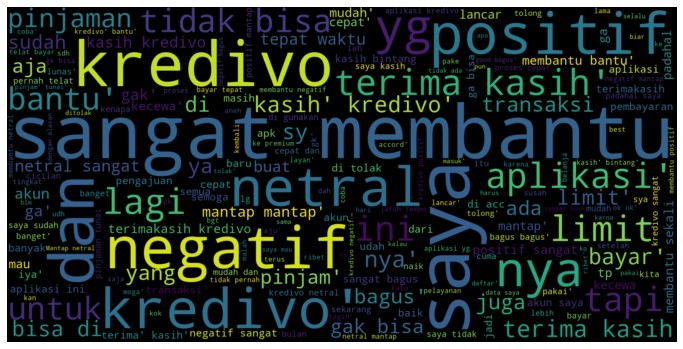

In [ ]:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df_dataReview['Stemming'].apply(lambda x: ' '.join(x))
Y = df_dataReview['sentiment'].apply(lambda y: ' '.join(y))

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2)

vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

SVM = svm.SVC(kernel='rbf')    #Jika dengan Kernel RBF
SVM = svm.SVC(kernel='linear') #Jika dengan Kernel Linear
SVM.fit(x_train,y_train)

acc_score = cross_val_score(SVM, x_train, y_train, cv=2, scoring='accuracy')
pre_score = cross_val_score(SVM, x_train, y_train, cv=2, scoring='precision_macro')
rec_score = cross_val_score(SVM, x_train, y_train, cv=2, scoring='recall_macro')
f_score = cross_val_score(SVM, x_train, y_train, cv=2, scoring='f1_macro')

print('Hasil Accuracy : %s' % (acc_score))
print('Hasil Rata - Rata Accuracy : %s' % acc_score.mean())
print('Hasil Precision : %s' % (pre_score))
print('Hasil Rata - Rata Precision : %s' % pre_score.mean())
print('Hasil Recall : %s' % (rec_score))
print('Hasil Rata - Rata Recall : %s' % rec_score.mean())
print('Hasil F-Measure : %s' % (f_score))
print('Hasil Rata - Rata F-Measure : %s' % f_score.mean())

NameError: ignored